In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import display
import matplotlib.pyplot as plt
import warnings

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# 1. load data

In [2]:
train_df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

display(train_df)
display(test_df)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


# 2. Preprocessing

## 2.1 impute null values

In [3]:
# drop name column
train_df = train_df.drop(columns = ['Name'])
test_df = test_df.drop(columns = ['Name'])

In [4]:
#show number of missing values
display(train_df.isna().sum())
print('\n')
display(test_df.isna().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [5]:
display(train_df.describe())
display(test_df.describe())

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [6]:
# impute missing values
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

In [7]:
for col in ["Age", "RoomService", "FoodCourt","ShoppingMall","Spa", "VRDeck"]:
    mean_imputer.fit(np.array(train_df[col]).reshape(-1,1))
    train_df[col] = list(mean_imputer.transform(np.array(train_df[col]).reshape(-1,1)).flatten())
    test_df[col] = list(mean_imputer.transform(np.array(test_df[col]).reshape(-1,1)).flatten())

In [8]:
#show number of missing values

display(train_df.isna().sum())
print('\n')
display(test_df.isna().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age               0
VIP              93
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
dtype: int64

In [9]:
display(train_df.describe())
display(test_df.describe())

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000
mean,28.661759,219.370209,439.945098,177.213808,303.243399,310.600510
std,14.027405,601.163307,1508.611971,554.357508,1103.913770,1235.274861
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,79.000000,143.000000,51.000000,83.000000,53.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


## 2.2 split "cabin"

In [10]:
# split cabin
train_df[["Cabin1","Cabin2","Cabin3"]] = train_df["Cabin"].str.split("/", n=3, expand= True)
test_df[["Cabin1","Cabin2","Cabin3"]] = test_df["Cabin"].str.split("/", n=3, expand= True)

train_df = train_df.drop(columns = ['Cabin'])
test_df = test_df.drop(columns = ['Cabin'])

In [11]:
# put cabin2 into bins
train_df["Cabin2"] = train_df["Cabin2"].astype(float)
test_df["Cabin2"] = test_df["Cabin2"].astype(float)

In [12]:
print(min(train_df["Cabin2"]), max(train_df["Cabin2"]))
print(min(test_df["Cabin2"]), max(test_df["Cabin2"]))

0.0 1894.0
0.0 1890.0


In [13]:
# put cabin2 into bins
train_df["Cabin2_bin"] = ''
test_df["Cabin2_bin"] = ''
train_df.loc[train_df["Cabin2"].isna(), "Cabin2_bin"] = np.nan
test_df.loc[test_df["Cabin2"].isna(), "Cabin2_bin"] = np.nan

for i in range(1,39):
    upper = i*100
    lower = (i-1)*100
    
    scope = str(lower)+"_"+str(upper)
    
    train_df.loc[(train_df["Cabin2"]>=lower) & (train_df["Cabin2"]<upper), "Cabin2_bin"] = scope
    test_df.loc[(test_df["Cabin2"]>=lower) & (test_df["Cabin2"]<upper), "Cabin2_bin"] = scope

train_df = train_df.drop(columns = ['Cabin2'])
test_df = test_df.drop(columns = ['Cabin2'])

In [14]:
display(train_df.iloc[:,10:])
display(test_df.iloc[:,10:])

,VRDeck,Transported,Cabin1,Cabin3,Cabin2_bin
0,0.0,False,B,P,0_100
1,44.0,True,F,S,0_100
2,49.0,False,A,S,0_100
3,193.0,False,A,S,0_100
4,2.0,True,F,S,0_100
...,...,...,...,...,...
8688,74.0,False,A,P,0_100
8689,0.0,False,G,S,1400_1500
8690,0.0,True,G,S,1500_1600
8691,3235.0,False,E,S,600_700


,VRDeck,Cabin1,Cabin3,Cabin2_bin
0,0.0,G,S,0_100
1,0.0,F,S,0_100
2,0.0,C,S,0_100
3,585.0,C,S,0_100
4,0.0,F,S,0_100
...,...,...,...,...
4272,0.0,G,S,1400_1500
4273,144.0,NaN,NaN,NaN
4274,0.0,D,P,200_300
4275,523.0,D,P,200_300


## 2.3 create dummy variables

In [15]:
# create dummy variables for Transported
def create_dummy_from_TF(df, col):
    new_col = col+"_dummy" 
    
    df[new_col] = 0
    df.loc[df[col] == True, new_col] = 1
    
create_dummy_from_TF(train_df, 'Transported')

train_df = train_df.drop(columns = ['Transported'])

In [16]:
# create dummy variables for HomePlanet, CryoSleep, Cabin, Destination, VIP
train_df_dummy = pd.get_dummies(data = train_df,
                                dummy_na  = True,
                                columns = ["HomePlanet", "CryoSleep", "Destination", "VIP", "Cabin1", "Cabin3", 'Cabin2_bin'],
                                dtype = int
                               )

test_df_dummy = pd.get_dummies(data = test_df,
                               dummy_na  = True,
                               columns = ["HomePlanet", "CryoSleep", "Destination", "VIP", "Cabin1", "Cabin3", 'Cabin2_bin'],
                               dtype = int
                              )

In [17]:
# make sure test df has same columns as train df
cols = train_df_dummy.columns

for col in cols:
    if (col not in test_df_dummy.columns):
        test_df_dummy[col] = 0

# reorder column orders
test_df_dummy = test_df_dummy[cols]
test_df_dummy = test_df_dummy.drop(columns = ["Transported_dummy"])

In [18]:
display(train_df_dummy)
display(test_df_dummy)

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported_dummy,HomePlanet_Earth,HomePlanet_Europa,...,Cabin2_bin_1800_1900,Cabin2_bin_200_300,Cabin2_bin_300_400,Cabin2_bin_400_500,Cabin2_bin_500_600,Cabin2_bin_600_700,Cabin2_bin_700_800,Cabin2_bin_800_900,Cabin2_bin_900_1000,Cabin2_bin_nan
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,41.0,0.0,6819.0,0.0,1643.0,74.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8689,9278_01,18.0,0.0,0.0,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8690,9279_01,26.0,0.0,0.0,1872.0,1.0,0.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8691,9280_01,32.0,0.0,1049.0,0.0,353.0,3235.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Cabin2_bin_1800_1900,Cabin2_bin_200_300,Cabin2_bin_300_400,Cabin2_bin_400_500,Cabin2_bin_500_600,Cabin2_bin_600_700,Cabin2_bin_700_800,Cabin2_bin_800_900,Cabin2_bin_900_1000,Cabin2_bin_nan
0,0013_01,27.00000,0.0,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0018_01,19.00000,0.0,9.0,0.0,2823.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0019_01,31.00000,0.0,0.0,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0021_01,38.00000,0.0,6652.0,0.0,181.0,585.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0023_01,20.00000,10.0,0.0,635.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,34.00000,0.0,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4273,9269_01,42.00000,0.0,847.0,17.0,10.0,144.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4274,9271_01,28.82793,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4275,9273_01,28.82793,0.0,2680.0,0.0,0.0,523.0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


## 2.4 convert dataframes in to numpy arrays

In [19]:
# retrive "transported_dummy"
y_train = np.array(train_df['Transported_dummy'])

train_df_dummy = train_df_dummy.drop(columns = ['Transported_dummy', 'PassengerId'])
x_train = np.array(train_df_dummy)

test_PassengerId = list(test_df_dummy['PassengerId'])
test_df_dummy = test_df_dummy.drop(columns = [ 'PassengerId'])
x_test = np.array(test_df_dummy)

In [20]:
print(y_train.shape)
print(x_train.shape)
print(x_test.shape)

(8693,)
(8693, 52)
(4277, 52)


# 3. Exploratary analysis

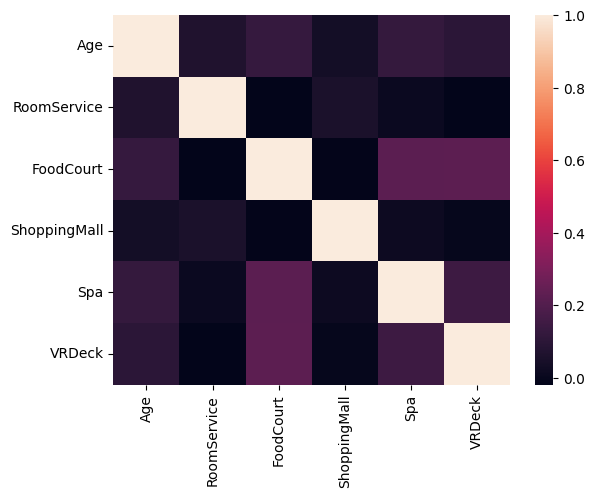

In [21]:
# correlation
import seaborn as sns
sns.heatmap(train_df_dummy.iloc[:, 0:6].corr());

In [22]:
print("number of people transported: ", np.sum(y_train))
print("number of people not transported: ", y_train.shape[0] - np.sum(y_train))

number of people transported:  4378
number of people not transported:  4315


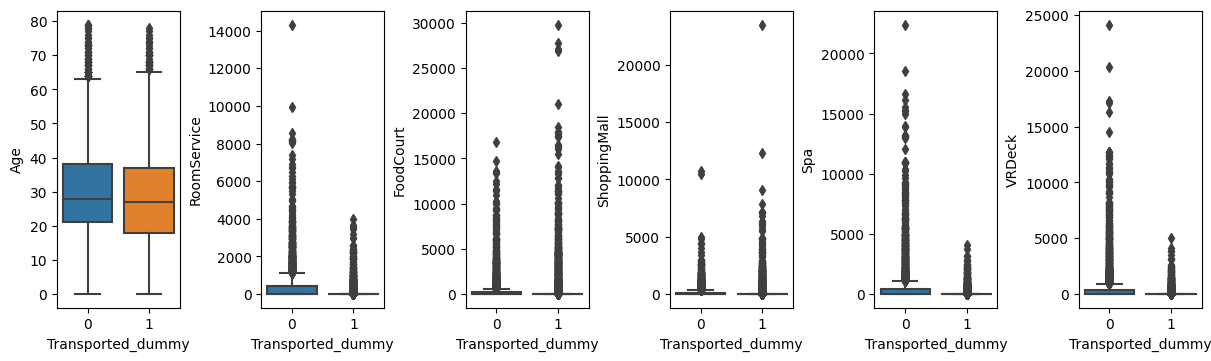

In [23]:
plt.figure(figsize = (12, 3.5), layout = 'constrained')

for i, col in enumerate(["Age", "RoomService", "FoodCourt","ShoppingMall","Spa", "VRDeck"]):

    plt.subplot(1,6,i+1)
    sns.boxplot(x='Transported_dummy', y= col, data=train_df)

plt.show()

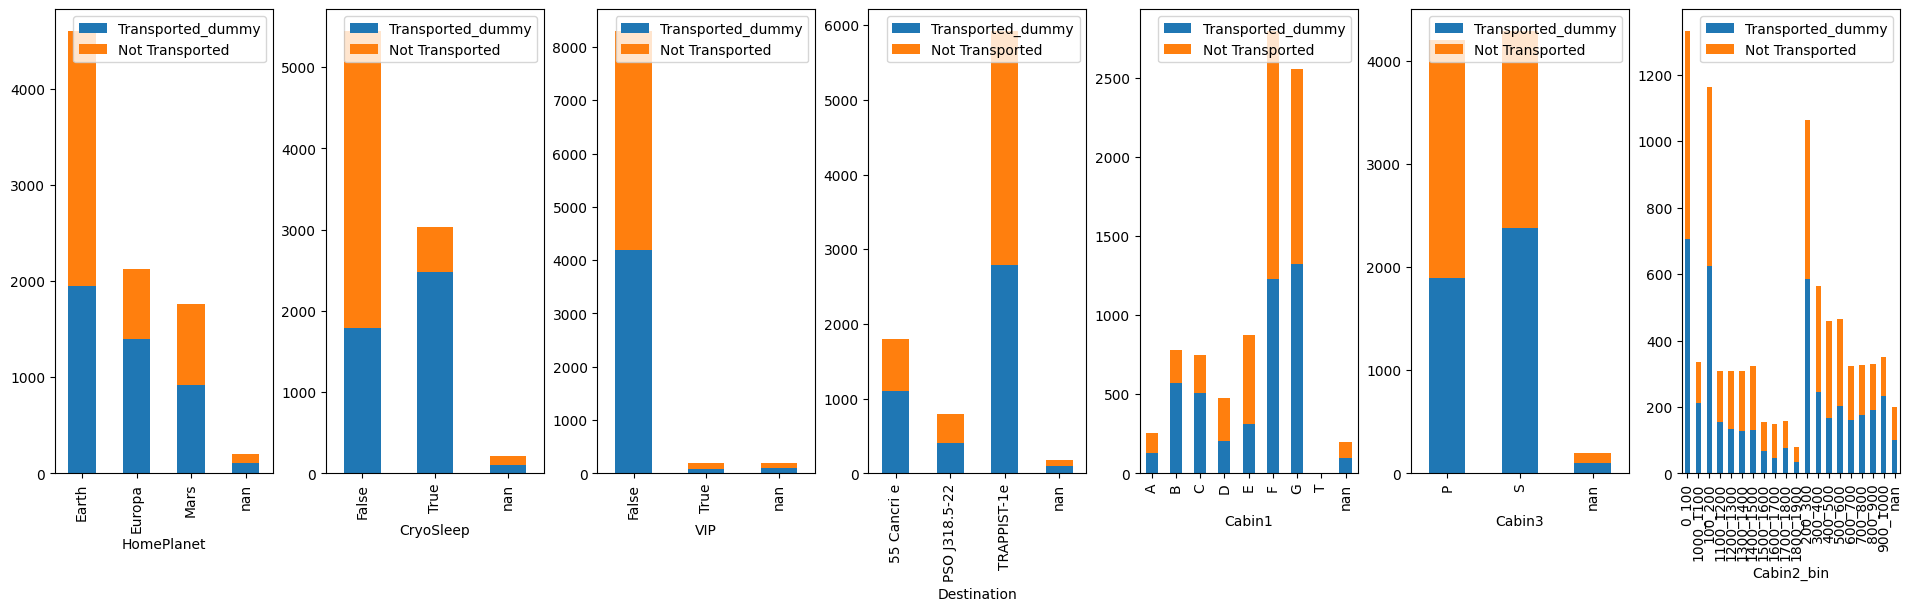

In [24]:
fig, axes = plt.subplots(nrows=1,
                         ncols=7,
                         figsize = (19, 6),
                         layout = 'constrained')

for i, col in enumerate(["HomePlanet", "CryoSleep", "VIP", "Destination","Cabin1", "Cabin3", 'Cabin2_bin']):
    
    sub_df_sum = train_df[["Transported_dummy",  col]].groupby([col], dropna = False).sum()
    sub_df_count = train_df[["Transported_dummy",  col]].groupby([col], dropna = False).count()
    sub_df_count = sub_df_count.rename(columns = {"Transported_dummy": "Count"})
    
    sub_df = sub_df_sum.merge(sub_df_count,
                              how = 'inner',
                              left_index = True,
                              right_index = True
                             )
    
    sub_df["Not Transported"] = sub_df["Count"] - sub_df["Transported_dummy"]  
    sub_df = sub_df.drop(columns = ["Count"])
    
    sub_df.plot(kind='bar', stacked=True, ax=axes[i])

plt.show()

In [25]:
for i, col in enumerate(["HomePlanet", "CryoSleep", "Destination", "VIP", "Cabin1", "Cabin3", 'Cabin2_bin']):
    
    sub_df_sum = train_df[["Transported_dummy",  col]].groupby([col], dropna = False).count()
    display(sub_df_sum)

,Transported_dummy
HomePlanet,
Earth,4602
Europa,2131
Mars,1759
NaN,201


,Transported_dummy
CryoSleep,
False,5439
True,3037
NaN,217


,Transported_dummy
Destination,
55 Cancri e,1800
PSO J318.5-22,796
TRAPPIST-1e,5915
NaN,182


,Transported_dummy
VIP,
False,8291
True,199
NaN,203


,Transported_dummy
Cabin1,
A,256
B,779
C,747
D,478
E,876
F,2794
G,2559
T,5
NaN,199


,Transported_dummy
Cabin3,
P,4206
S,4288
NaN,199


,Transported_dummy
Cabin2_bin,
0_100,1331
1000_1100,334
100_200,1164
1100_1200,308
1200_1300,309
1300_1400,307
1400_1500,322
1500_1600,154
1600_1700,148


# 4. Train & Predict

In [27]:
from sklearn.model_selection import GridSearchCV, KFold

def display_cv_result(grid_search_cv):
    df = pd.DataFrame(grid_search_cv.cv_results_['params'])
    df['mean_test_score'] = grid_search_cv.cv_results_['mean_test_score']
    df = df.sort_values(by = ['mean_test_score'], ascending = [False])

    display(df)

cv_splitter = KFold(n_splits = 5, shuffle = True)

## 4.1 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RandomForest = RandomForestClassifier()

param = {'n_estimators': [i*20 for i in range(2,21)],
         'criterion': ["gini", "entropy"],
         'class_weight': [None],
        }

RandomForest_select = GridSearchCV(estimator = RandomForest,
                                   param_grid = param,
                                   scoring = "accuracy",
                                   cv =cv_splitter,
                                   return_train_score = True
                                  )

RandomForest_select.fit(x_train, y_train)

In [ ]:
display_cv_result(RandomForest_select)

In [ ]:
prediction = RandomForest_select.predict(x_test)

In [ ]:
pred_df = pd.DataFrame({"PassengerId": test_PassengerId,
                        "Transported 0_1": list(prediction)})

pred_df["Transported 0_1"] = pred_df["Transported 0_1"].astype(int)
pred_df["Transported"] = 'False'
pred_df.loc[pred_df["Transported 0_1"] == 1,"Transported"] = 'True'
pred_df = pred_df.drop(columns = ["Transported 0_1"])

display(pred_df)

pred_df.to_csv('/kaggle/working/Spaceship Titanic-Random Forest.csv', index = False)

## 4.2 XGBoost

In [28]:
from xgboost import XGBClassifier

In [29]:
xgb = XGBClassifier()

param = {'n_estimators': [i*30 for i in range(1,14)],
         'tree_method': ['hist'],
         'grow_policy': ['lossguide', 'depthwise'],
         'device':['cuda']
        }

xgb_select = GridSearchCV(estimator = xgb,
                          param_grid = param,
                          scoring = "accuracy",
                          cv =cv_splitter,
                          return_train_score = True
                         )

xgb_select.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     i...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'device': ['cuda'],
                         'grow_policy': ['lossguide', 'depthwise'],
                         'n_estimators': [30, 60, 90, 120, 150, 180, 210, 240,
                                          270, 300, 330, 360, 390],
                         'tree_method': ['exact', 'hist']},
             return_train_score=True, scoring='accuracy')

In [30]:
display_cv_result(xgb_select)

,device,grow_policy,n_estimators,tree_method,mean_test_score
1,cuda,lossguide,30,hist,0.806398
27,cuda,depthwise,30,hist,0.806398
29,cuda,depthwise,60,hist,0.806397
3,cuda,lossguide,60,hist,0.806397
7,cuda,lossguide,120,hist,0.803177
33,cuda,depthwise,120,hist,0.803177
31,cuda,depthwise,90,hist,0.802716
5,cuda,lossguide,90,hist,0.802716
9,cuda,lossguide,150,hist,0.802602
35,cuda,depthwise,150,hist,0.802602


In [32]:
prediction = xgb_select.predict(x_test)

In [33]:
pred_df = pd.DataFrame({"PassengerId": test_PassengerId,
                        "Transported 0_1": list(prediction)})

pred_df["Transported 0_1"] = pred_df["Transported 0_1"].astype(int)
pred_df["Transported"] = 'False'
pred_df.loc[pred_df["Transported 0_1"] == 1,"Transported"] = 'True'
pred_df = pred_df.drop(columns = ["Transported 0_1"])

display(pred_df)

pred_df.to_csv('/kaggle/working/Spaceship Titanic-xgboost.csv', index = False)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


## 4.3 AdaBoost

In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [39]:
# decision tree

tree_list = []

for criterion in ['gini', 'entropy']:
    for max_depth in [None, 1, 2, 3, 4]:
        tree = DecisionTreeClassifier(criterion = criterion,
                                      max_depth = max_depth)
        tree_list += [tree]

In [ ]:
adaboost = AdaBoostClassifier()

param = {'n_estimators': [i*50 for i in range(1,9)],
         'estimator': tree_list,
         'learning_rate': [0.5, 1]
        }

adaboost_select = GridSearchCV(estimator = adaboost,
                               param_grid = param,
                               scoring = "accuracy",
                               cv =cv_splitter,
                               return_train_score = True
                              )

adaboost_select.fit(x_train, y_train)

In [ ]:
prediction = adaboost_select.predict(x_test)

In [ ]:
pred_df = pd.DataFrame({"PassengerId": test_PassengerId,
                        "Transported 0_1": list(prediction)})

pred_df["Transported 0_1"] = pred_df["Transported 0_1"].astype(int)
pred_df["Transported"] = 'False'
pred_df.loc[pred_df["Transported 0_1"] == 1,"Transported"] = 'True'
pred_df = pred_df.drop(columns = ["Transported 0_1"])

display(pred_df)

pred_df.to_csv('/kaggle/working/Spaceship Titanic-adaboost.csv', index = False)